# How Calibrated Are You? xD

### Thomas J Fan - @thomasjpfan
#### scikit-learn core developer

<table align="left"><td>
<a target="_blank" href="https://colab.research.google.com/github/thomasjpfan/lightning-talks/blob/master/2020_01_23_how_calibrated_are_you/notebook.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank" href="https://github.com/thomasjpfan/lightning-talks/blob/master/2020_01_23_how_calibrated_are_you/notebook.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['lines.linewidth'] = 2.5

import pandas as pd
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 20)

In [0]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows=[0], index_col=0)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# What are the features?

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. 
- X12-X17: Amount of bill statement 
- X18-X23: Amount of previous payment 

# Train test split!

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.2)

# Logestic Regression!

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

log_r = make_pipeline(StandardScaler(), LogisticRegression())

In [8]:
log_r.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Prediction from LR

In [0]:
log_r_pp_test = log_r.predict_proba(X_test)[:, 1]

In [0]:
from sklearn.metrics import roc_auc_score

In [11]:
roc_auc_score(y_test, log_r_pp_test)

0.7143906270384583

# Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = make_pipeline(StandardScaler(), GaussianNB())

In [14]:
nb.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

# Prediction from Naive Bayes

In [0]:
nb_pp_test = nb.predict_proba(X_test)[:, 1]

In [16]:
roc_auc_score(y_test, nb_pp_test)

0.7205306147921867

## Plotting API

In [0]:
from sklearn.metrics import plot_roc_curve

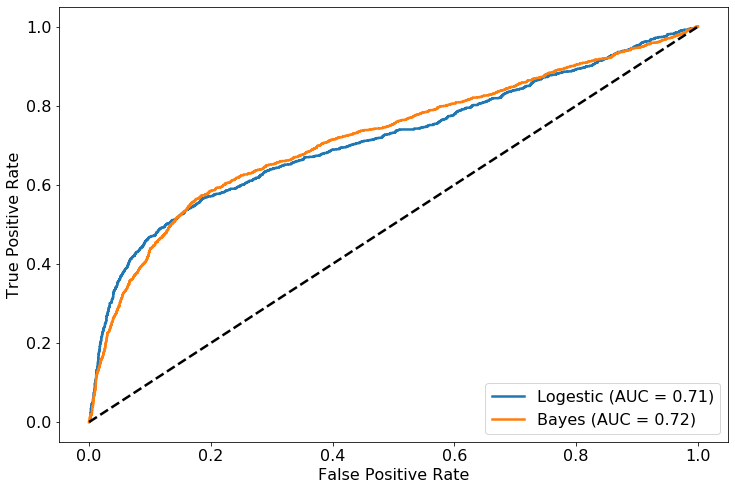

In [18]:
fig, ax = plt.subplots()
plot_roc_curve(log_r, X_test, y_test, ax=ax, name='Logestic')
plot_roc_curve(nb, X_test, y_test, ax=ax, name='Bayes')
ax.plot([0, 1], [0, 1], c='black', ls='--')

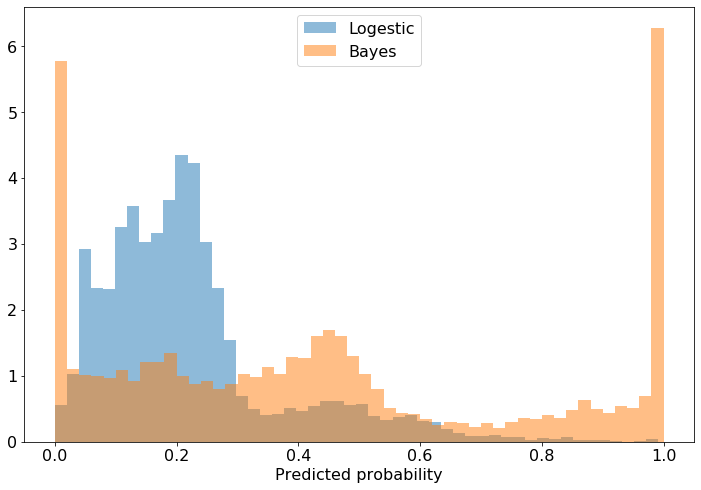

In [19]:
fig, ax = plt.subplots()
ax.hist(log_r_pp_test, bins=50, label='Logestic', alpha=0.5, density=True)
ax.hist(nb_pp_test, bins=50, label="Bayes", alpha=0.5, density=True)
ax.set_xlabel("Predicted probability")
ax.legend()

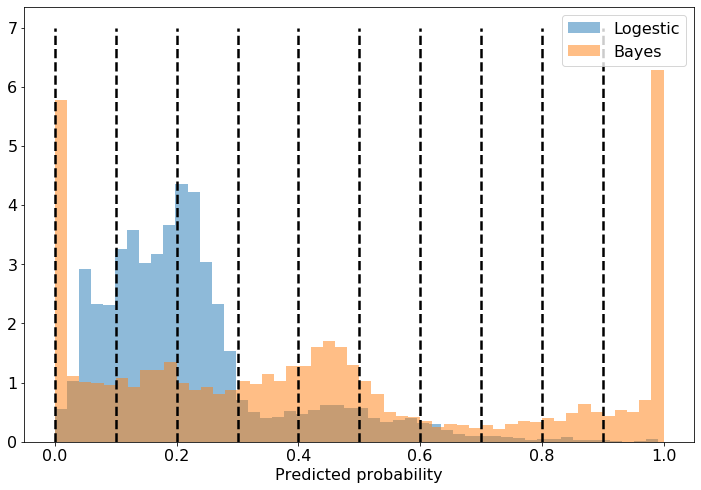

In [20]:
fig, ax = plt.subplots()
ax.hist(log_r_pp_test, bins=50, label='Logestic', alpha=0.5, density=True)
ax.hist(nb_pp_test, bins=50, label="Bayes", alpha=0.5, density=True)
for i in range(10):
    ax.plot([i/10, i/10], [0, 7], '--', c='black')
ax.set_xlabel("Predicted probability")
ax.legend(loc='upper right')

In [0]:
from sklearn.calibration import calibration_curve

In [0]:
lr_frac_pos, lr_mean_pv = calibration_curve(y_test, log_r_pp_test, n_bins=10)
nb_frac_pos, nb_mean_pv = calibration_curve(y_test, nb_pp_test, n_bins=10)

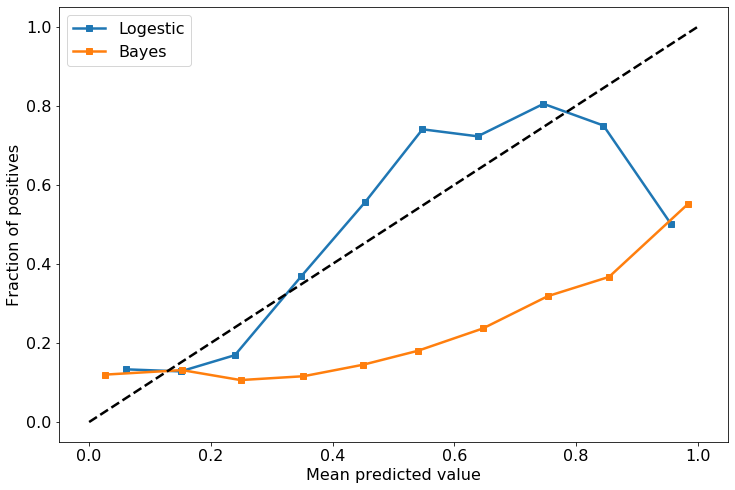

In [23]:
fig, ax = plt.subplots()
ax.plot(lr_mean_pv, lr_frac_pos, 's-', label='Logestic')
ax.plot(nb_mean_pv, nb_frac_pos, 's-', label='Bayes')
ax.plot([0, 1], [0, 1], c='black', ls='--')
ax.set(xlabel="Mean predicted value",
       ylabel="Fraction of positives")
ax.legend()

In [0]:
from sklearn.metrics import brier_score_loss

In [25]:
brier_score_loss(y_test, log_r_pp_test)

0.14555465019243463

In [26]:
brier_score_loss(y_test, nb_pp_test)

0.23153865050564407

# Calibrating NB

In [0]:
from sklearn.calibration import CalibratedClassifierCV

In [0]:
nb_cal = CalibratedClassifierCV(
    make_pipeline(StandardScaler(), GaussianNB())
, cv=5, method='isotonic')

In [29]:
nb_cal.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(memory=None,
                                               steps=[('standardscaler',
                                                       StandardScaler(copy=True,
                                                                      with_mean=True,
                                                                      with_std=True)),
                                                      ('gaussiannb',
                                                       GaussianNB(priors=None,
                                                                  var_smoothing=1e-09))],
                                               verbose=False),
                       cv=5, method='isotonic')

In [0]:
nb_cal_pp_test = nb_cal.predict_proba(X_test)[:, 1]

In [31]:
brier_score_loss(y_test, nb_cal_pp_test)

0.14467651633871761

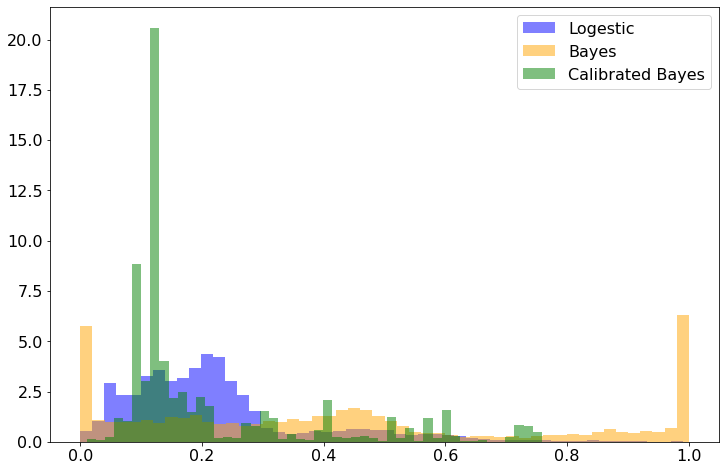

In [37]:
fig, ax = plt.subplots()
nb_cal_pp_test
ax.hist(log_r_pp_test, bins=50, label='Logestic', density=True, alpha=0.5, color='blue')
ax.hist(nb_pp_test, bins=50, label="Bayes", density=True, color='orange', alpha=0.5)
ax.hist(nb_cal_pp_test, bins=50, label="Calibrated Bayes", density=True, color='green', alpha=0.5)
ax.legend()

## Calibration Curve!

In [0]:
nb_cal_frac_pos, nb_cal_mean_pv = calibration_curve(y_test, nb_cal_pp_test, n_bins=10)

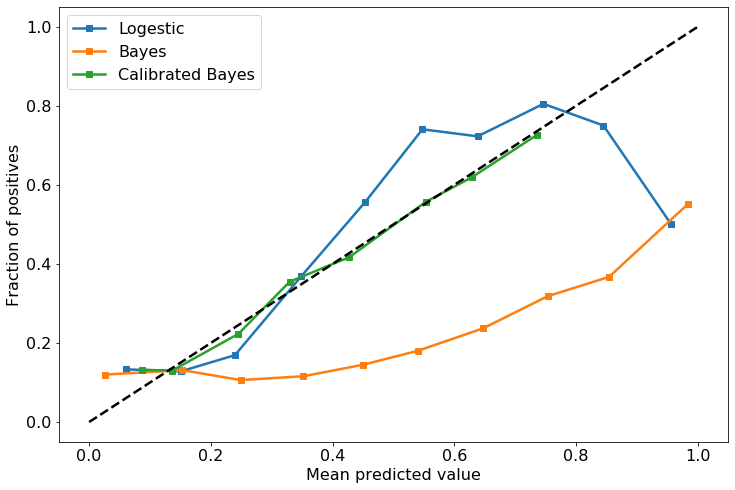

In [34]:
fig, ax = plt.subplots()
ax.plot(lr_mean_pv, lr_frac_pos, 's-', label='Logestic')
ax.plot(nb_mean_pv, nb_frac_pos, 's-', label='Bayes')
# ax.plot(lr_cal_mean_pv, lr_cal_frac_pos, 's-', label='Calibrated Logestic')
ax.plot(nb_cal_mean_pv, nb_cal_frac_pos, 's-', label='Calibrated Bayes')
ax.plot([0, 1], [0, 1], c='black', ls='--')
ax.set(xlabel="Mean predicted value",
       ylabel="Fraction of positives")
ax.legend()